In [1]:
import pandas as pd
df = pd.read_csv("dm_c.csv")

In [2]:
df.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,Is_Good
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1


In [3]:
df.isnull().sum()

Age           0
Gender        0
OwnHome       0
Married       0
Location      0
Salary        0
Children      0
History     303
Catalogs      0
Cust_Id       0
Is_Good       0
dtype: int64

In [4]:
df['History'].fillna("new_cust",inplace=True)

In [5]:
df.isnull().sum()

Age         0
Gender      0
OwnHome     0
Married     0
Location    0
Salary      0
Children    0
History     0
Catalogs    0
Cust_Id     0
Is_Good     0
dtype: int64

In [7]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [8]:
df_dummy.head()

,Salary,Children,Catalogs,Cust_Id,Is_Good,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_new_cust
0,47500,0,6,247,0,1,0,0,0,1,1,0,0,0
1,63600,0,6,127,1,0,0,1,1,1,0,0,0,0
2,13500,0,18,479,0,0,1,0,1,1,0,1,0,0
3,85600,1,18,475,1,0,0,1,0,0,0,0,0,0
4,68400,0,12,151,1,0,0,0,0,1,0,0,0,0


In [9]:
X = df_dummy.drop(['Cust_Id','Is_Good'],axis=1).values

In [11]:
y = df_dummy['Is_Good'].values

In [12]:
from sklearn import tree

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [14]:
clf = clf.fit(X,y)

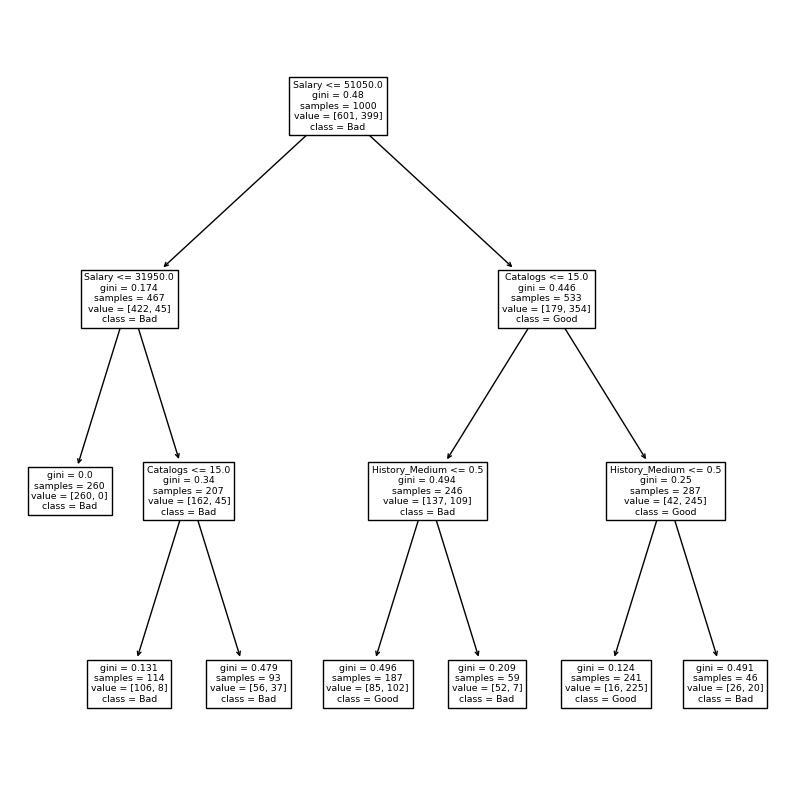

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf,class_names = ['Bad','Good'],
               feature_names=df_dummy.drop(['Cust_Id','Is_Good'],axis=1).columns)
plt.show()

In [17]:
df_dummy.head()

,Salary,Children,Catalogs,Cust_Id,Is_Good,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_new_cust
0,47500,0,6,247,0,1,0,0,0,1,1,0,0,0
1,63600,0,6,127,1,0,0,1,1,1,0,0,0,0
2,13500,0,18,479,0,0,1,0,1,1,0,1,0,0
3,85600,1,18,475,1,0,0,1,0,0,0,0,0,0
4,68400,0,12,151,1,0,0,0,0,1,0,0,0,0


In [18]:
clf.feature_importances_

array([0.65264586, 0.        , 0.21193207, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.13542207, 0.        ])

In [19]:
df_dummy.drop(['Cust_Id','Is_Good'],axis=1)

,Salary,Children,Catalogs,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_new_cust
0,47500,0,6,1,0,0,0,1,1,0,0,0
1,63600,0,6,0,0,1,1,1,0,0,0,0
2,13500,0,18,0,1,0,1,1,0,1,0,0
3,85600,1,18,0,0,1,0,0,0,0,0,0
4,68400,0,12,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,19400,1,18,0,1,0,1,1,0,0,0,1
996,40500,1,18,0,0,1,1,1,1,0,0,1
997,44800,0,24,1,0,1,0,1,0,0,1,0
998,79000,2,18,0,0,1,0,0,0,0,1,0
